<a href="https://colab.research.google.com/github/ZacharySBrown/vcu-scma440-2021q1/blob/master/labs/SOLUTIONS/MultipleRegression1_SOLUTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and Fetch Data
Press the play button in Google Colab or press Shift+Enter execute the cell below to download and load the data and packages for this assignment

This will setup you environment and load a DataFrame called `boston` that contains the data from Makridakis Problem 6.5, as well as a `DataFrame` called `boston_months` that contains the months from the `boston` data already created as dummy variables

In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.stattools import durbin_watson
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display


from scipy.stats import t, f

%matplotlib inline

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 16

!curl https://vcu-scma-440.s3.amazonaws.com/data/boston.csv > boston.csv

boston_months = pd.read_csv('boston.csv', parse_dates=['date']).set_index('date')

boston = boston_months.drop([c for c in boston_months.columns if c.startswith('month')], axis=1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1815  100  1815    0     0  14069      0 --:--:-- --:--:-- --:--:-- 14069


# Exploring the data

Below, we take a look at the top of the data, and plot the `boston` and `ny` columns

In [ ]:
boston.head()

,boston,ny
date,,
1967-01-01,10581.6,78.8
1967-02-01,10234.3,69.1
1967-03-01,13299.5,87.6
1967-04-01,10746.5,72.8
1967-05-01,13310.7,79.4


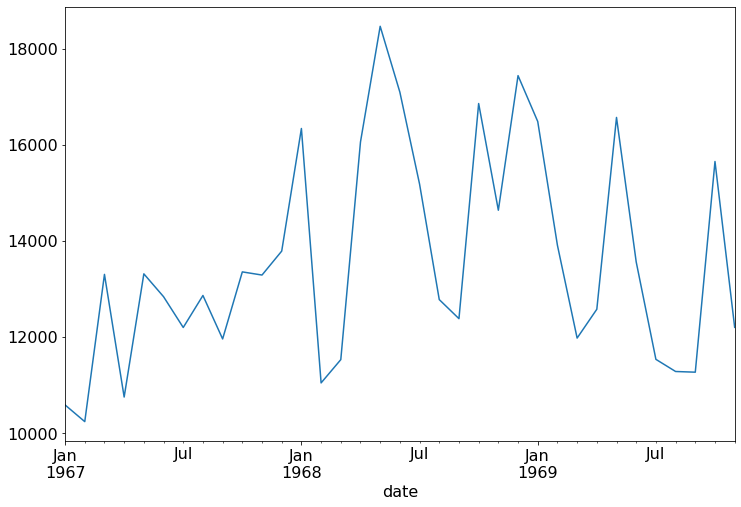

In [ ]:
boston['boston'].plot()

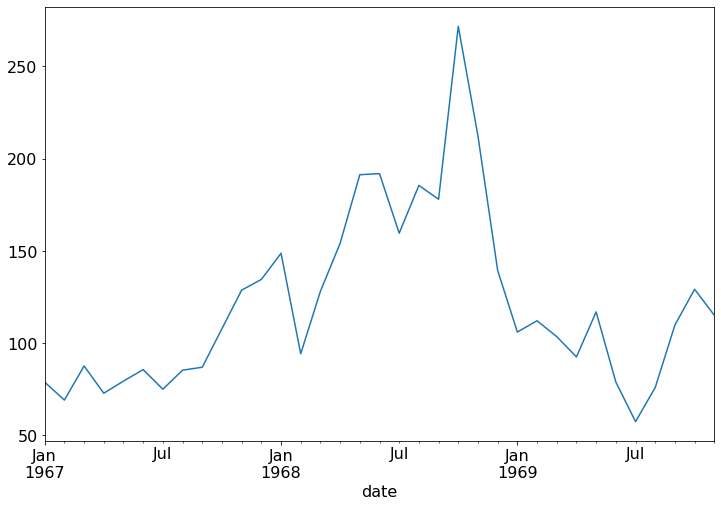

In [ ]:
boston['ny'].plot()

# 1. Plot a Scatter Matrix and Compute Correlations

Is there a noticeable relationship between the `boston` and `ny` variables in the scatter plots? Is there a strong correlation?

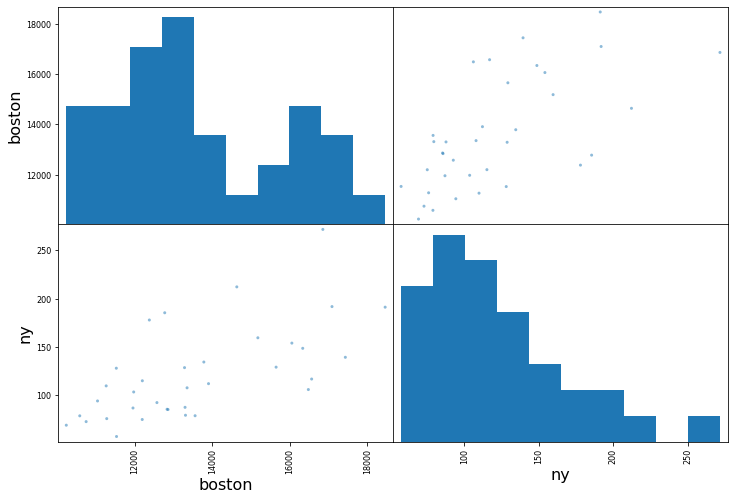

In [ ]:
# In this cell, plot a scatter matrix plot

# YOUR CODE HERE

my_figure = pd.plotting.scatter_matrix(boston)

In [ ]:
# In this cell, compute the correlations

# YOUR CODE HERE

boston.corr()

,boston,ny
boston,1.000000,0.640062
ny,0.640062,1.000000


# 2. Create a Simple Regression

Use `boston` as your dependent (`y`) variable, and `ny` as your dependent (`x`) variable. 

Is this overall fit significant? Is the coefficient for `ny` significant? Is the intercept term significant?

In [ ]:
# In this cell, create a regression model
# fit it to your data, and print out the summary

# YOUR CODE HERE

model = ols('boston ~ ny', boston)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 boston   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     22.90
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           3.47e-05
Time:                        21:04:33   Log-Likelihood:                -309.69
No. Observations:                  35   AIC:                             623.4
Df Residuals:                      33   BIC:                             626.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9979.5249    806.902     12.368      0.0

# 3. Checking Residuals

For the residuals, do the following:

1. Plot the residuals
2. Plot the ACF of the residuals
3. Calculate the Durbin-Watson Statistic for the residuals

Do these methods indicate that there is significant autocorrelation in the resdiduals?

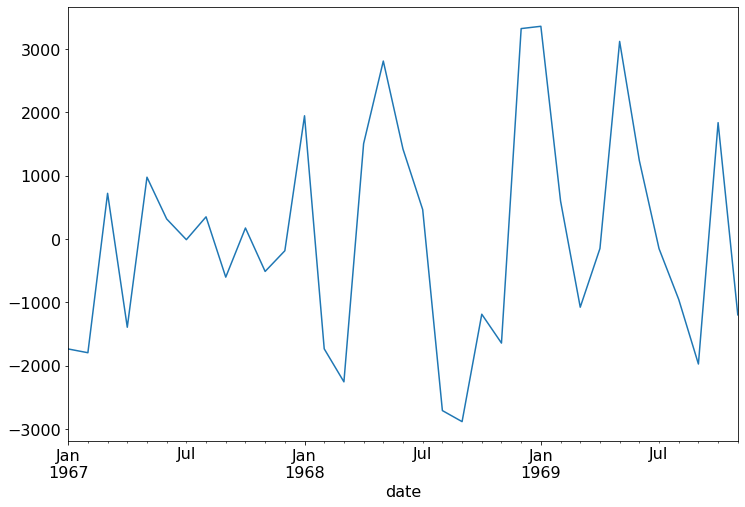

In [ ]:
# In this cell, plot the residuals

# YOUR CODE HERE

boston['residuals'] = results.resid

boston['residuals'].plot()

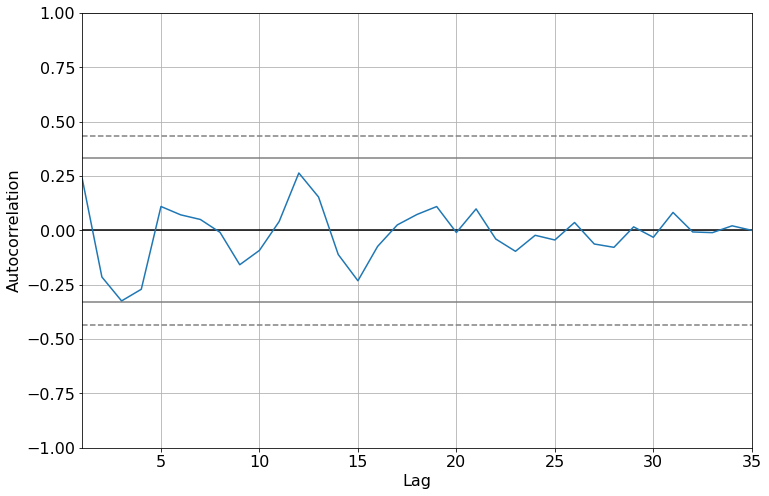

In [ ]:
# In this cell, plot the ACF plot of the residuals

# YOUR CODE HERE

my_figure = pd.plotting.autocorrelation_plot(boston['residuals'])

In [ ]:
# In this cell, calculate the Durbin-Watson Statistic

# YOUR CODE HERE

durbin_watson(boston['residuals'])

1.478687043331196

# 4. Fitting a Regression with Monthly Dummy Variables

We'll now use the `boston_months` `DataFrame` to fit a regression that includes monthly dummy variables. Let's first take a look at the data:

In [ ]:
boston_months.head()

,boston,ny,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,
1967-01-01,10581.6,78.8,1,0,0,0,0,0,0,0,0,0,0,0
1967-02-01,10234.3,69.1,0,1,0,0,0,0,0,0,0,0,0,0
1967-03-01,13299.5,87.6,0,0,1,0,0,0,0,0,0,0,0,0
1967-04-01,10746.5,72.8,0,0,0,1,0,0,0,0,0,0,0,0
1967-05-01,13310.7,79.4,0,0,0,0,1,0,0,0,0,0,0,0


In the cell below, create a regression model for the `boston_months` data, with the `boston` variable as the dependent (`y`) variable, and `ny` and the `month_` variables as the independent variables. 

In [ ]:
# YOUR CODE HERE

model = ols('boston ~ ny + month_1 + month_2 + month_3 + month_4 + month_5 + month_6 + month_7 + month_8 + month_9 + month_10 + month_11 + month_12', boston_months)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 boston   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     4.541
Date:                Mon, 15 Mar 2021   Prob (F-statistic):            0.00106
Time:                        21:13:18   Log-Likelihood:                -297.10
No. Observations:                  35   AIC:                             620.2
Df Residuals:                      22   BIC:                             640.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9461.0329    710.130     13.323      0.0

Some of the monthly variables above may not be significant. Try removing them from the formula and repeating the regression. Does the adjusted $R^2$ value improve?

In [ ]:
# In this cell, create a new regression with months that are not
# significant removed

# YOUR CODE HERE

model = ols('boston ~ ny + month_1 + month_5 + month_6 + month_12', boston_months)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 boston   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.583
Method:                 Least Squares   F-statistic:                     10.52
Date:                Mon, 15 Mar 2021   Prob (F-statistic):           7.87e-06
Time:                        21:15:53   Log-Likelihood:                -300.81
No. Observations:                  35   AIC:                             613.6
Df Residuals:                      29   BIC:                             623.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9402.7105    688.133     13.664      0.0